Model:
 Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (1): ReLU()
  (2): Conv2d(32, 64, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (3): ReLU()
  (4): Conv2d(64, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (5): ReLU()
  (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
  (7): ReLU()
  (8): AdaptiveAvgPool2d(output_size=(1, 1))
  (9): Conv2d(128, 10, kernel_size=(1, 1), stride=(1, 1))
  (10): Flatten(start_dim=1, end_dim=-1)
)
Train Epoch: 1-000 batch_loss=2.31e+00 batch_acc=0.047 lr=5.000e-04 
Train Epoch: 1-046 batch_loss=1.54e+00 batch_acc=0.492 lr=4.969e-04 
Train Epoch: 1-092 batch_loss=7.19e-01 batch_acc=0.828 lr=4.879e-04 
Train Epoch: 1-138 batch_loss=5.60e-01 batch_acc=0.852 lr=4.733e-04 
Train Epoch: 1-184 batch_loss=2.61e-01 batch_acc=0.922 lr=4.534e-04 
Train Epoch: 1-230 batch_loss=5.19e-01 batch_acc=0.852 lr=4.287e-04 
Train Epoch: 1-276 batch_loss=1.95e-01 batch_acc=0.969 lr=3.997e-04 
Tra

(0.9535525497512437, 0.9585)

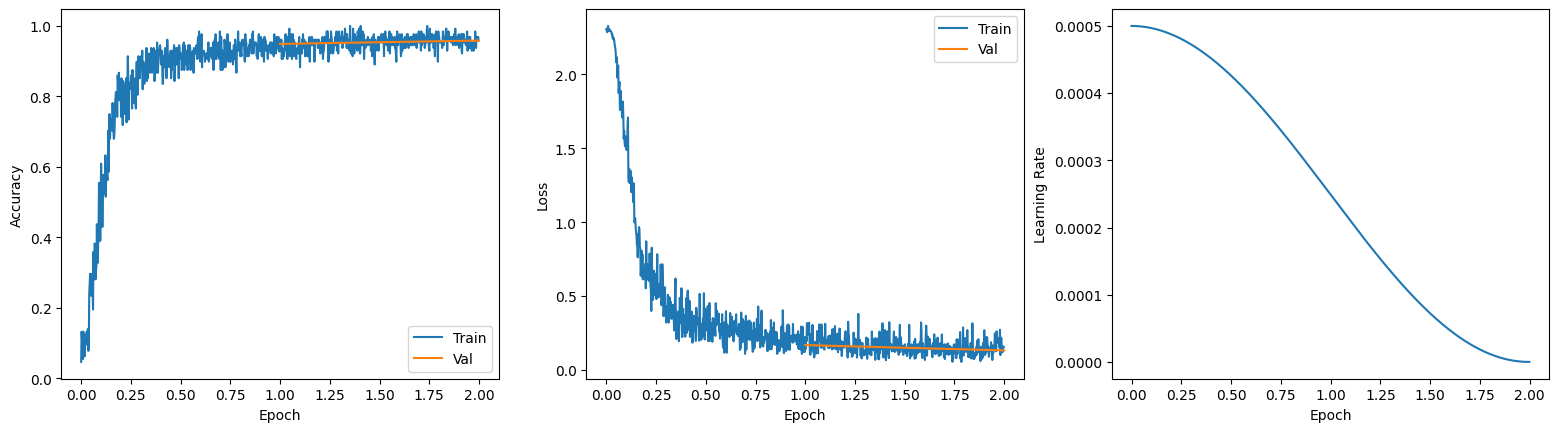

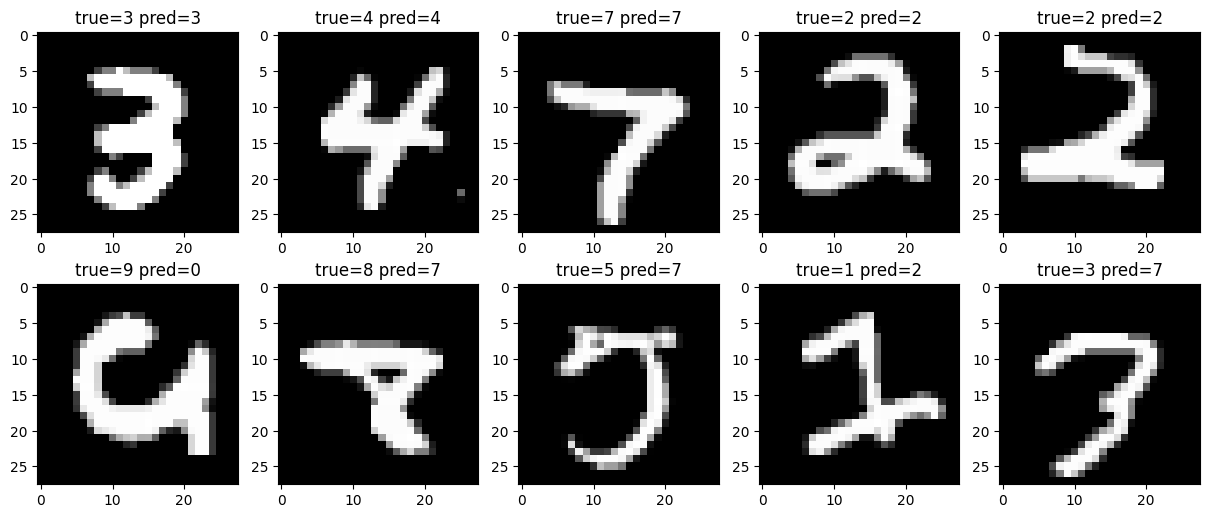

In [1]:
from network.training import run_training
from network.models import get_cnn

from torchvision import datasets
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
num_epochs = 2
image_size = 28 # min value

optimizer_kwargs = dict(
    lr=5e-4,
    weight_decay=1e-3,
)

data_kwargs = dict(
    base_dataset=datasets.MNIST,
    batch_size=128,
    img_size=image_size,
    random_shift=False,
    scramble_image=False,
    noise=0., # 1.
)

run_training(
    model_factory=get_cnn,
    num_epochs=num_epochs,
    optimizer_kwargs=optimizer_kwargs,
    data_kwargs=data_kwargs,
    device=device,
)

Model:
 Sequential(
  (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
  )
  (4): ResidualBlock(
    (conv1): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (conv2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(16,

(0.8809246179815209, 0.8773)

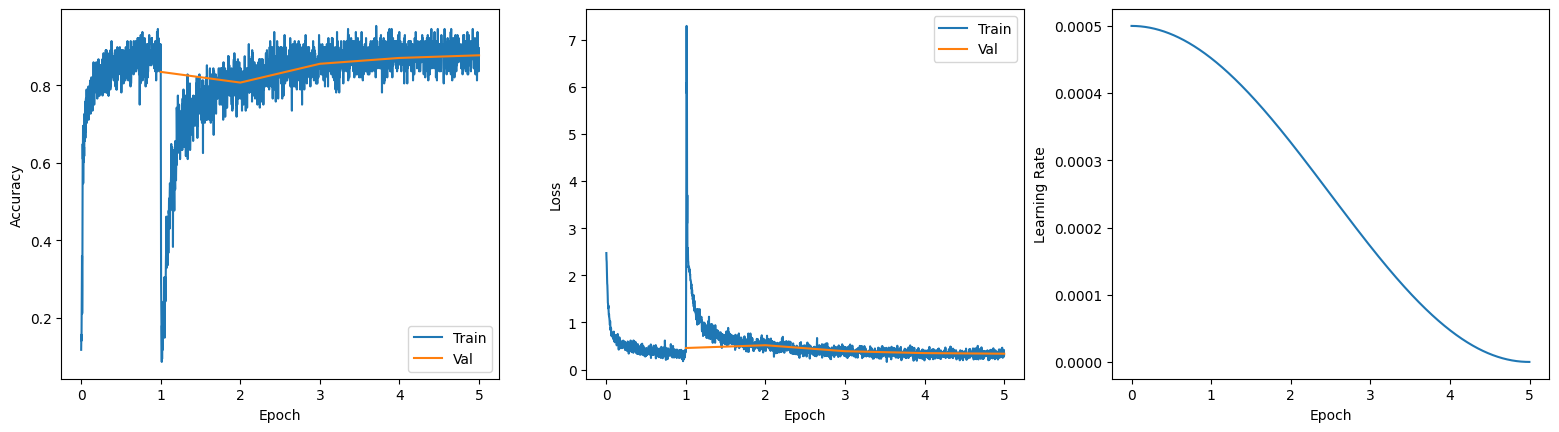

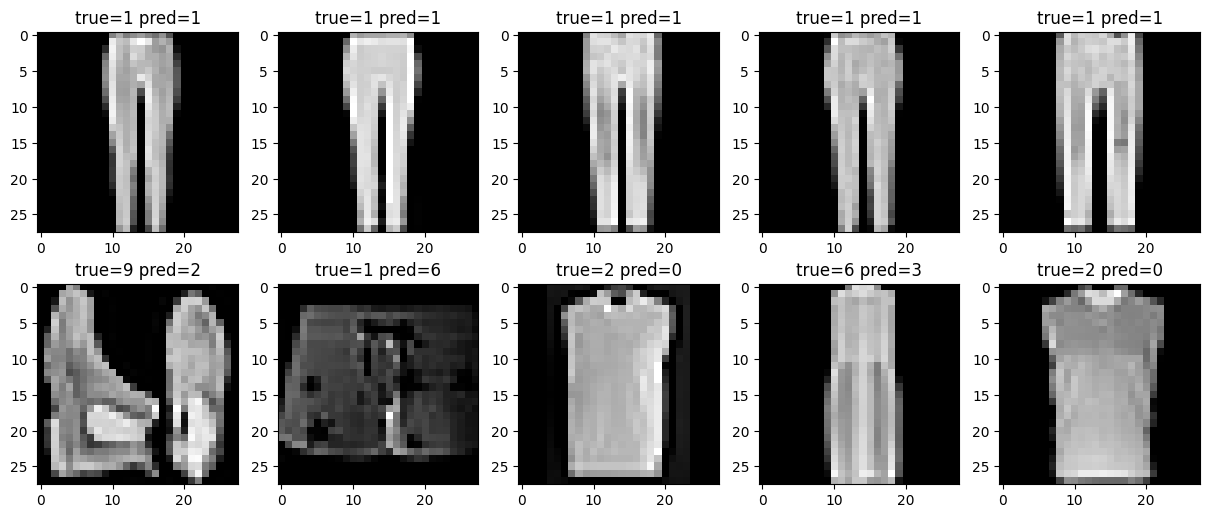

In [3]:
from network.models import get_residual

optimizer_kwargs = dict(
    lr=5e-4,
    weight_decay=1e-3,
)
num_epochs = 5
image_size = 28 # min value

model_factory = lambda: get_residual(20, "ResidualBlock")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

data_kwargs = dict(
    base_dataset=datasets.FashionMNIST,
    batch_size=128,
    img_size=image_size,
    random_shift=False,
    scramble_image=False,
    noise=0.0,
)

run_training(
    model_factory=model_factory,
    num_epochs=num_epochs,
    optimizer_kwargs=optimizer_kwargs,
    data_kwargs=data_kwargs,
    device=device,
)